In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
%matplotlib inline

"""
This will create a movie from images
"""

def image_animation(data, num_frames, center, interval=20, fps=15,
                    movie_name="movie.mp4", movie_writer='avconv',
                    vmin=None, vmax=None):
    """
    Parameters
    ----------
    data_array : array
        image data array for the movie
        dimensions are: [num_img][num_rows][num_cols]

    num_frames : int
        number of frames in the array

    interval : int, optional
        delay between frames

    movie_name : str, optional
        name of the movie to save

    movie_writer : str, optional
        movie writer

    fps : int, optional
        Frame rate for movie.

    Returns
    -------
    ani :
        movie

    """
    #data = np.load(data_array)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    fig, ax = plt.subplots()
    im =ax.imshow(data[0], origin='lower', cmap=cm,
              interpolation="nearest" , norm=LogNorm(vmin=0.01,  vmax=10))
    fig.set_size_inches([5, 5])
    ax.set_xlabel("pixels", **axis_font2)
    ax.set_ylabel("pixels", **axis_font2)
    #tight_layout()
    rwidth = 100
    x1, x2 = [center[1] - rwidth, center[1] + rwidth]
    y1, y2 = [center[0] - rwidth, center[0] + rwidth]
    ax.set_xlim([x1, x2])
    ax.set_ylim([y1, y2])
    plt.colorbar(im, fraction=0.046, pad=0.04)

    def update_img(n):
        im.set_data(data[n])

    ani = animation.FuncAnimation(fig, update_img, num_frames,
                                  interval=interval)
    writer = animation.writers[movie_writer](fps=fps)

    ani.save(movie_name, writer=writer)
    return ani

def get_data(n):
    return data[n]



In [3]:
import copy
cm = copy.copy(plt.get_cmap("viridis"))
cm.set_bad('k')
axis_font = {'fontname':'Arial', 'size':'20'}
axis_font2 = {'fontname':'Arial', 'size':'14'}

In [4]:
Si_ = np.load("Si_100.npy")

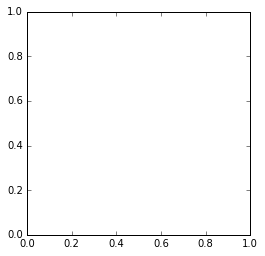

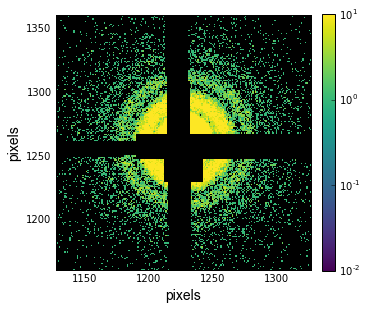

In [5]:
num_frames = 100
movie_name = "Si.mp4"
vmin = 1e0
center = [1227, 1261]  # center of the speckle pattern, read from [image_x, image_y], ((not python y,x))
center=[center[1], center[0]]

image_animation(Si_, num_frames, center, interval=100, fps=15,
                    movie_name=movie_name)

# How to upload the plot 

In [2]:
def image_animation_two(full_gen, interval=20, fps=15,
                    movie_name="movie.mp4", movie_writer='avconv',
                    vmin=None, vmax=None, cmap='viridis'):
    """
    Parameters
    ----------
    data_array : array
        image data array for the movie
        dimensions are: [num_img][num_rows][num_cols]

    num_frames : int
        number of frames in the array

    interval : int, optional
        delay between frames

    movie_name : str, optional
        name of the movie to save

    movie_writer : str, optional
        movie writer

    fps : int, optional
        Frame rate for movie.

    Returns
    -------
    ani :
        movie

    """
    #data = np.load(data_array)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')
    im = ax.imshow(np.zeros((500, 500)), origin="low", cmap='viridis')
    fig.set_size_inches([5, 5])
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)

    def update_img(g2s):
        im.set_data(g2s)
    
    
    for idx, intermediate_state1 in enumerate(full_gen):
        if idx % 25 == 0:
            print('processing %s' % idx)
            result1 = corr.two_time_state_to_results(intermediate_state1)
            #print (result1.g2[1].shape)
            #if idx==0:
            #    im = ax.imshow(result1.g2[1], origin="low", cmap='viridis')
            #    fig.set_size_inches([5, 5])
            #else:
            ani = animation.FuncAnimation(fig, update_img(result1.g2[1]), 20,
                                  interval=interval)
            writer = animation.writers[movie_writer]
            ani.save(movie_name, writer=writer)
    return ani

def get_data(n):
    return data[n]

In [3]:
pwd

'/mnt/hgfs/Data/ipython_NoteBooks/my_ipy_notebook/NYSDS'

In [4]:
import skbeam.core.correlation as corr
from skbeam.core.correlation import two_time_corr, two_time_state_to_results
import skbeam.core.roi as roi
import skbeam.core.utils as utils

#from xray_vision.mpl_plotting.roi import show_label_array_on_image

import numpy as np
import time as ttime
import matplotlib.pyplot as plt
#%matplotlib notebook

# multi-tau scheme info
real_data_levels = 7
real_data_bufs = 8
real_data = np.load("/mnt/hgfs/Data/All_NSLS2/scikit-beam-examples/demos/time_correlation/100_500_NIPA_GEL.npy")

avg_img = np.average(real_data, axis=0)

# generate some circular ROIs
# define the ROIs
roi_start = 65 # in pixels
roi_width = 9 # in pixels
roi_spacing = (5.0, 4.0)
x_center = 7. # in pixels
y_center = (129.) # in pixels
num_rings = 3

# get the edges of the rings
edges = roi.ring_edges(roi_start, width=roi_width, 
                       spacing=roi_spacing, num_rings=num_rings)

# get the label array from the ring shaped 3 region of interests(ROI's)
labeled_roi_array = roi.rings(
    edges, (y_center, x_center), real_data.shape[1:])

In [5]:
num_levs = 1
num_bufs = real_data.shape[0]
full_gen = corr.lazy_two_time(labeled_roi_array, real_data, 
                              real_data.shape[0], num_bufs, num_levs)

In [25]:
def two_image_animation(data, num_frames, interval=50, fps=15,
                    movie_name="movie.mp4", movie_writer='avconv',
                    vmin=None, vmax=None, cmap='viridis'):
    """
    Parameters
    ----------
    data_array : array
        image data array for the movie
        dimensions are: [num_img][num_rows][num_cols]

    num_frames : int
        number of frames in the array

    interval : int, optional
        delay between frames

    movie_name : str, optional
        name of the movie to save

    movie_writer : str, optional
        movie writer

    fps : int, optional
        Frame rate for movie.

    Returns
    -------
    ani :
        movie

    """
    #data = np.load(data_array)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal')

    im = ax.imshow(data[0], cmap=cmap, origin="lower")
    ax.set_ylabel("t$_1$(ms)")
    ax.set_xlabel("t$_2$(ms)")
    fig.set_size_inches([5, 5])
    
    lo, hi = np.min(data[0, :, :]),np.max(data[0, : ,:])
    lo = lo if lo > 1 else 1
    # high bound should be at least the low bound
    hi = lo if hi < lo else hi
    im.set_clim(lo, hi)

    def update_img(n):
        im.set_data(data[n])

    ani = animation.FuncAnimation(fig, update_img, num_frames,
                                  interval=interval)
    writer = animation.writers[movie_writer](fps=fps)

    ani.save(movie_name, writer=writer)
    return ani

In [19]:
num_levs = 1
num_bufs = real_data.shape[0]
full_gen = corr.lazy_two_time(labeled_roi_array, real_data, 
                              real_data.shape[0], num_bufs, num_levs)

In [14]:
import copy as copy
new_array = []
plt.figure()
for idx, intermediate_state1 in enumerate(full_gen):
    if idx % 5 == 0:
        print('processing %s' % idx)
        result1 = corr.two_time_state_to_results(intermediate_state1)
        u = result1.g2[1, :, :]
        y = copy.copy(u)
        new_array.append(y) 
        

processing 0
processing 5
processing 10
processing 15
processing 20
processing 25
processing 30
processing 35
processing 40
processing 45
processing 50
processing 55
processing 60
processing 65
processing 70
processing 75
processing 80
processing 85
processing 90
processing 95
processing 100
processing 105
processing 110
processing 115
processing 120
processing 125
processing 130
processing 135
processing 140
processing 145
processing 150
processing 155
processing 160
processing 165
processing 170
processing 175
processing 180
processing 185
processing 190
processing 195
processing 200
processing 205
processing 210
processing 215
processing 220
processing 225
processing 230
processing 235
processing 240
processing 245
processing 250
processing 255
processing 260
processing 265
processing 270
processing 275
processing 280
processing 285
processing 290
processing 295
processing 300
processing 305
processing 310
processing 315
processing 320
processing 325
processing 330
processing 335
pr

In [15]:
new_two= np.asarray(new_array)

In [16]:
#np.save("two_par_5.npy", new_two)

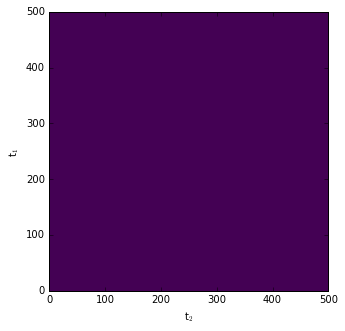

In [26]:

num_frames = 100
movie_name = "two_par_5.mp4"
vmin = 1e0

two_image_animation(new_two, num_frames, interval=100, fps=15,
                    movie_name=movie_name)


In [27]:
ls

movie.ipynb                 movie-two_time.ipynb  two_par_5.mp4  Untitled.ipynb
movie-two_time-Copy1.ipynb  Si_im.npy             two_par_5.npy


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 6*np.pi, 100)
y = np.sin(x)

# You probably won't need this if you're embedding things in a tkinter plot...
plt.ion()

fig = plt.figure()
ax = fig.add_subplot(111)
line1, = ax.plot(x, y, 'r-') # Returns a tuple of line objects, thus the comma

for phase in np.linspace(0, 10*np.pi, 500):
    line1.set_ydata(np.sin(x + phase))
    fig.canvas.draw()
